## 1. Importing basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/NNDL Project/aggregated_walmart.csv'
df = pd.read_csv(filepath)
df.head()

,User_ID,Avg_Purchase_Amount,ProductCategory_Diversity,Num_Transactions,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Most_Frequent_CategoryID,Cat_SpendProp_1,Cat_SpendProp_2,Cat_SpendProp_3,Cat_SpendProp_4,Cat_SpendProp_5,Cat_SpendProp_6,Cat_SpendProp_7,Cat_SpendProp_8,Cat_SpendProp_9,Cat_SpendProp_10,Cat_SpendProp_11,Cat_SpendProp_12,Cat_SpendProp_13,Cat_SpendProp_14,Cat_SpendProp_15,Cat_SpendProp_16,Cat_SpendProp_17,Cat_SpendProp_18,Cat_SpendProp_19,Cat_SpendProp_20,CLV
0,1000001,9545.514286,11,35,F,0-17,10,A,0,2,3,0.184392,0.038438,0.358759,0.016798,0.047140,0.049753,0.000000,0.208152,0.0,0.0,0.000000,0.012553,0.0,0.032958,0.000000,0.049226,0.0,0.000000,0.0,0.001832,334093
1,1000002,10525.610390,6,77,M,55+,16,C,0,4+,1,0.510405,0.019581,0.000000,0.000000,0.099312,0.111040,0.000000,0.259514,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000147,810472
2,1000003,11780.517241,6,29,M,26-35,15,A,0,3,1,0.669071,0.085044,0.031923,0.000000,0.185654,0.000000,0.000000,0.017027,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.011281,0.0,0.000000,341635
3,1000004,14747.714286,2,14,M,46-50,7,B,1,2,1,0.997670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.002330,206468
4,1000005,7745.292453,12,106,M,26-35,20,A,1,1,8,0.236785,0.031829,0.013217,0.009435,0.141807,0.080073,0.091296,0.317358,0.0,0.0,0.012848,0.000000,0.0,0.013502,0.021162,0.030688,0.0,0.000000,0.0,0.000000,821001


In [ ]:
df.shape

(5891, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     5891 non-null   int64  
 1   Avg_Purchase_Amount         5891 non-null   float64
 2   ProductCategory_Diversity   5891 non-null   int64  
 3   Num_Transactions            5891 non-null   int64  
 4   Gender                      5891 non-null   object 
 5   Age                         5891 non-null   object 
 6   Occupation                  5891 non-null   int64  
 7   City_Category               5891 non-null   object 
 8   Marital_Status              5891 non-null   int64  
 9   Stay_In_Current_City_Years  5891 non-null   object 
 10  Most_Frequent_CategoryID    5891 non-null   int64  
 11  Cat_SpendProp_1             5891 non-null   float64
 12  Cat_SpendProp_2             5891 non-null   float64
 13  Cat_SpendProp_3             5891 

In [ ]:
# Checking for missing values
df.isna().sum().unique()

array([0])

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

## 3. EDA

#### 3.1 Inspecting cardinality and frequency distribution of categorical variables

--------------------------------------------------------------------------------------------------------------------------------------------
Gender
No. of unique values in Gender: 2



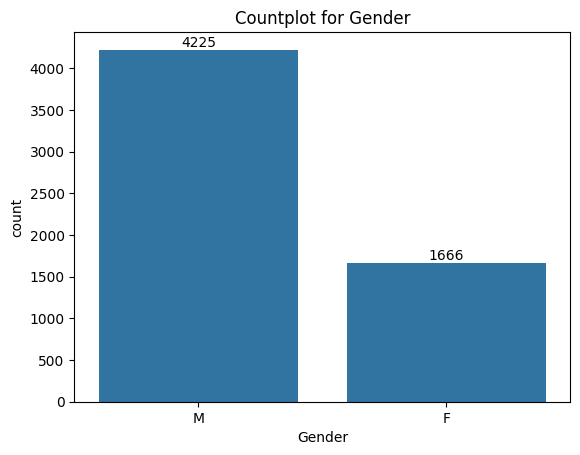


--------------------------------------------------------------------------------------------------------------------------------------------
Age
No. of unique values in Age: 7



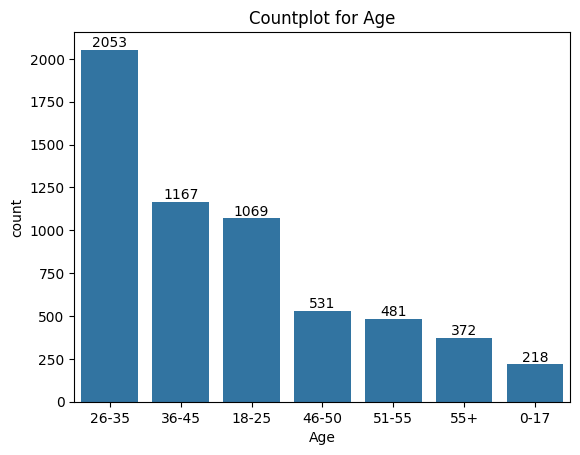


--------------------------------------------------------------------------------------------------------------------------------------------
Occupation
No. of unique values in Occupation: 21



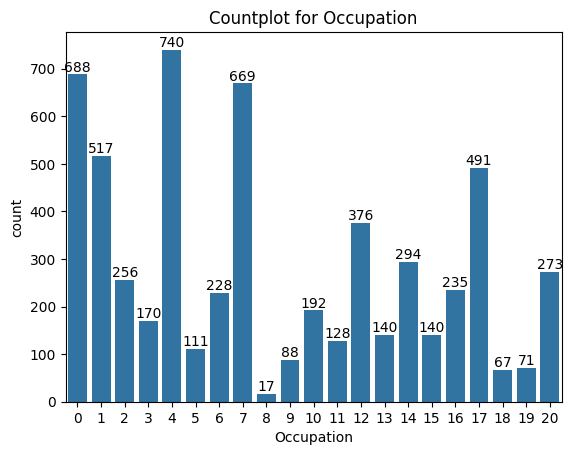


--------------------------------------------------------------------------------------------------------------------------------------------
City_Category
No. of unique values in City_Category: 3



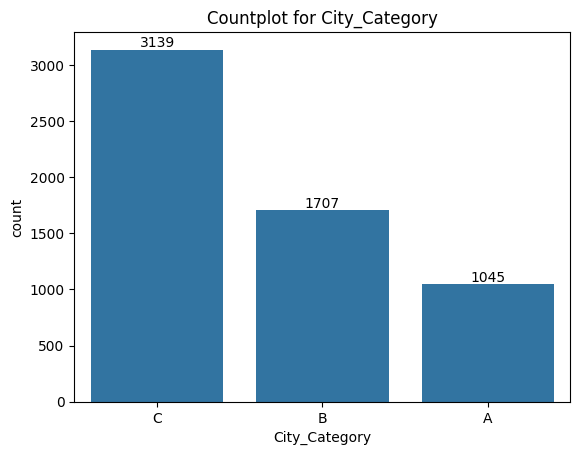


--------------------------------------------------------------------------------------------------------------------------------------------
Marital_Status
No. of unique values in Marital_Status: 2



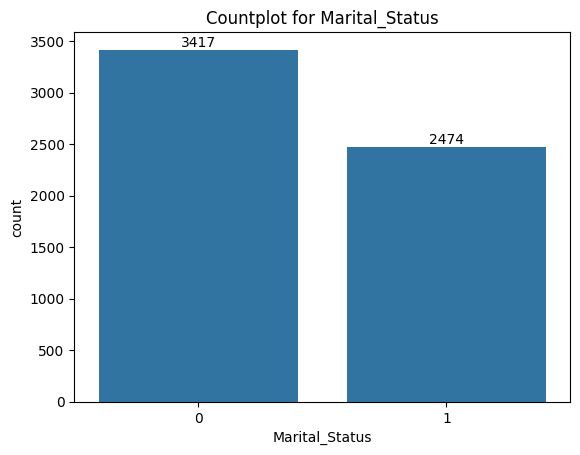


--------------------------------------------------------------------------------------------------------------------------------------------
Stay_In_Current_City_Years
No. of unique values in Stay_In_Current_City_Years: 5



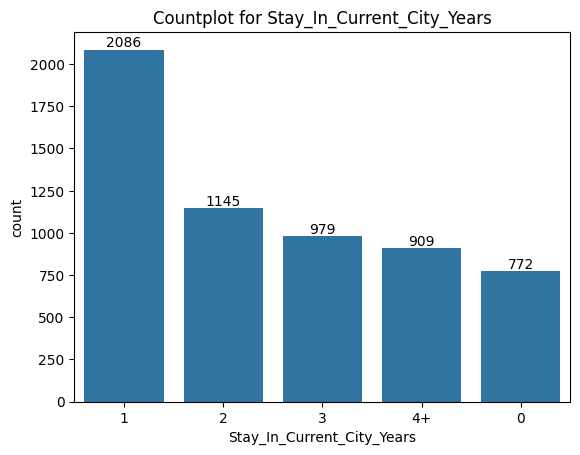


--------------------------------------------------------------------------------------------------------------------------------------------
ProductCategory_Diversity
No. of unique values in ProductCategory_Diversity: 19



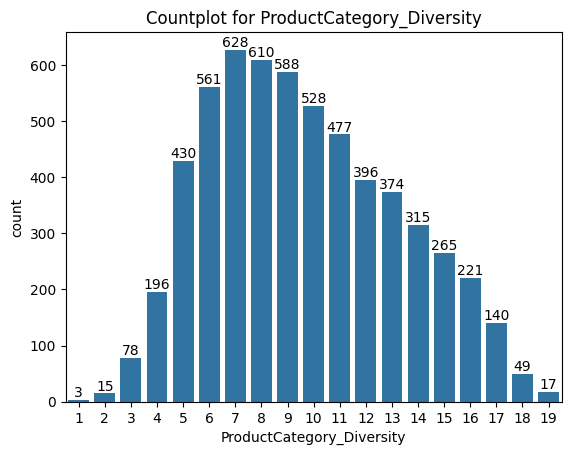


--------------------------------------------------------------------------------------------------------------------------------------------
Most_Frequent_CategoryID
No. of unique values in Most_Frequent_CategoryID: 15



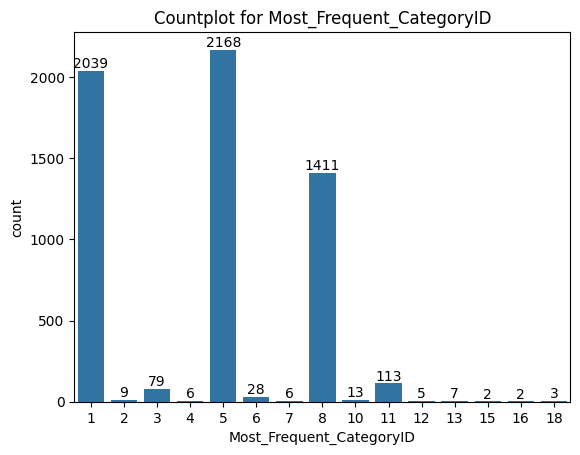

In [ ]:
cat_vbls = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years', 'ProductCategory_Diversity', 'Most_Frequent_CategoryID']

for col in cat_vbls:
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
    print(col)
    print(f"No. of unique values in {col}: {df[col].nunique()}")
    print()
    fig = sns.barplot(df[col].value_counts(), orient='v')
    for container in fig.containers:
        fig.bar_label(container)
    plt.title(f"Countplot for {col}")
    plt.show()
    print()

In [ ]:
# If a category appears in less than 1% of the total samples (i.e., ~60 out of 5891), we need to consider grouping.
# Merging rare categories in Most_Frequent_CategoryID
major_categories = [1, 5, 8, 11]
df['Most_Frequent_CategoryID'] = df['Most_Frequent_CategoryID'].apply(lambda i: i if i in major_categories else "Other")

Most_Frequent_CategoryID

No. of unique values in Most_Frequent_CategoryID: 5



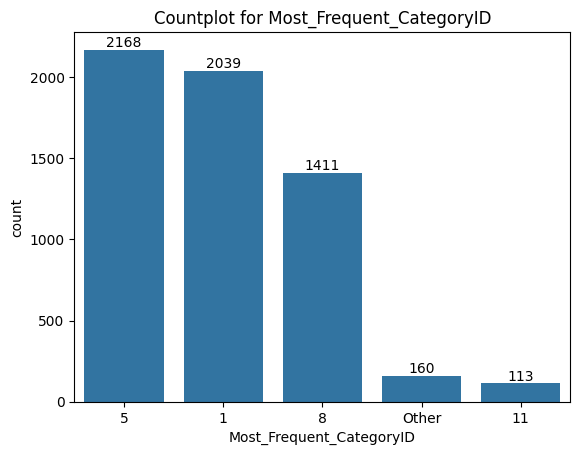

In [ ]:
# Unique values and count plot for updated 'Most_Frequent_CategoryID' column
print('Most_Frequent_CategoryID')
print()
print(f"No. of unique values in {'Most_Frequent_CategoryID'}: {df['Most_Frequent_CategoryID'].nunique()}")
print()
fig = sns.barplot(df['Most_Frequent_CategoryID'].value_counts(), orient='v')
for container in fig.containers:
    fig.bar_label(container)
plt.title(f"Countplot for {'Most_Frequent_CategoryID'}")
plt.show()

#### 3.2 Outlier and distribution check for numerical variables

In [ ]:
num_vbls =['Avg_Purchase_Amount', 'Num_Transactions']

--------------------------------------------------------------------------------------------------------------------------------------------
Avg_Purchase_Amount


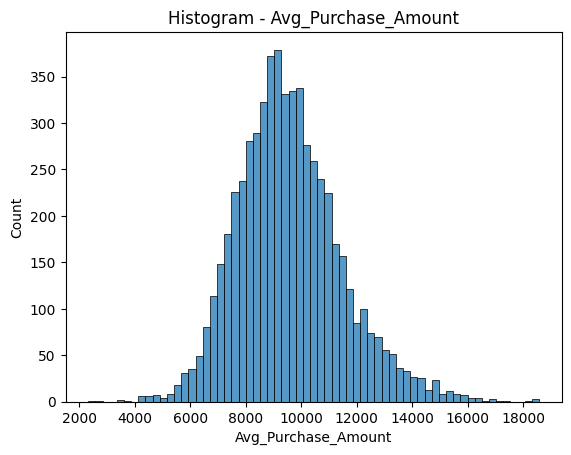

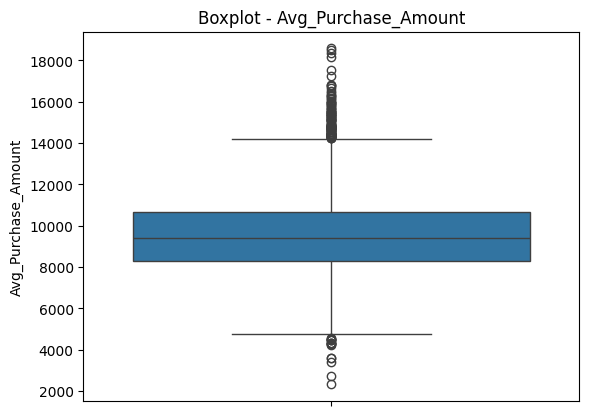


--------------------------------------------------------------------------------------------------------------------------------------------
Num_Transactions


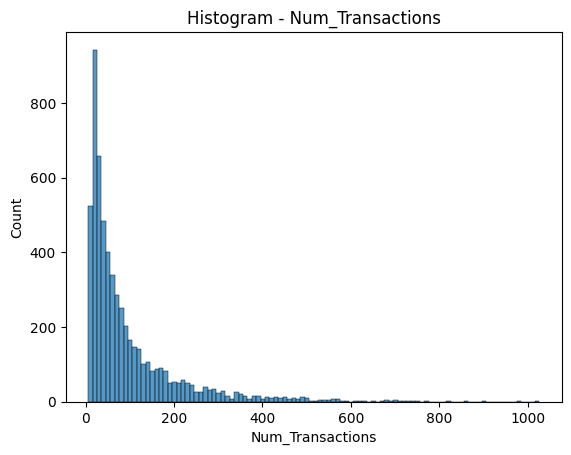

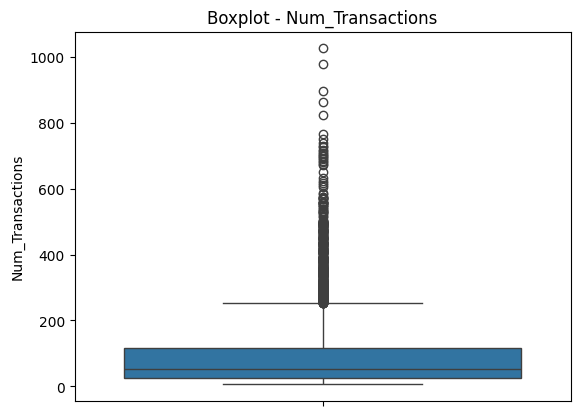

In [ ]:
# Histograms and Boxplots
for col in num_vbls:
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
    print(col)
    fig_1 = sns.histplot(df[col])
    plt.title(f"Histogram - {col}")
    plt.show()
    fig_2 = sns.boxplot(df[col], orient='v')
    plt.title(f"Boxplot - {col}")
    plt.show()
    print()

In [ ]:
# Outlier percentage check
def outlier_percentage(col):
    q1 = np.quantile(col, 0.25)
    q3 = np.quantile(col, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    count = 0
    for i in col:
        if ((i<lower_bound) or (i>upper_bound)):
            count += 1
    return (f"Outlier Percentage : {np.round((count/df.shape[0])*100, 2)}%",
            f"Outlier Count : {count}")

for col in num_vbls:
    print(col)
    print(outlier_percentage(df[col]))
    print()

Avg_Purchase_Amount
('Outlier Percentage : 2.16%', 'Outlier Count : 127')

Num_Transactions
('Outlier Percentage : 8.03%', 'Outlier Count : 473')



In [ ]:
# Checking outliers after appling Log Transformation (for right skewed vbls)
print(f"Num_Transactions (log-transformed)")
print(outlier_percentage(np.log1p(df["Num_Transactions"])))

Num_Transactions (log-transformed)
('Outlier Percentage : 0.0%', 'Outlier Count : 0')


In [ ]:
# Need to merge columns which describe proportion of amount spent on each category based on major and other categories
# In the same way like we did for 'Most_Frequent_CategoryID'

In [ ]:
category_spent_vbls = ['Cat_SpendProp_1', 'Cat_SpendProp_2', 'Cat_SpendProp_3','Cat_SpendProp_4',
 'Cat_SpendProp_5', 'Cat_SpendProp_6', 'Cat_SpendProp_7', 'Cat_SpendProp_8',
 'Cat_SpendProp_9', 'Cat_SpendProp_10', 'Cat_SpendProp_11', 'Cat_SpendProp_12',
 'Cat_SpendProp_13', 'Cat_SpendProp_14', 'Cat_SpendProp_15', 'Cat_SpendProp_16',
 'Cat_SpendProp_17', 'Cat_SpendProp_18', 'Cat_SpendProp_19', 'Cat_SpendProp_20']

In [ ]:
# Columns to retain and drop
retain_cols = [f'Cat_SpendProp_{cat}' for cat in major_categories if f'Cat_SpendProp_{cat}' in df.columns]
other_cols = [col for col in category_spent_vbls if col not in retain_cols]

# New Other column (sum of other_cols)
df['Cat_SpendProp_Other'] = df[other_cols].sum(axis=1)

# Retain only major category columns and the new "Other" column
df = df.drop(columns=other_cols)

df = df.reindex(columns= ['User_ID', 'Avg_Purchase_Amount',
       'ProductCategory_Diversity', 'Num_Transactions', 'Gender', 'Age',
       'Occupation', 'City_Category', 'Marital_Status',
       'Stay_In_Current_City_Years',
       'Most_Frequent_CategoryID', 'Cat_SpendProp_1', 'Cat_SpendProp_5',
       'Cat_SpendProp_8', 'Cat_SpendProp_11', 'Cat_SpendProp_Other', 'CLV'])

df.head()

,User_ID,Avg_Purchase_Amount,ProductCategory_Diversity,Num_Transactions,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Most_Frequent_CategoryID,Cat_SpendProp_1,Cat_SpendProp_5,Cat_SpendProp_8,Cat_SpendProp_11,Cat_SpendProp_Other,CLV
0,1000001,9545.514286,11,35,F,0-17,10,A,0,2,Other,0.184392,0.047140,0.208152,0.000000,0.560317,334093
1,1000002,10525.610390,6,77,M,55+,16,C,0,4+,1,0.510405,0.099312,0.259514,0.000000,0.130768,810472
2,1000003,11780.517241,6,29,M,26-35,15,A,0,3,1,0.669071,0.185654,0.017027,0.000000,0.128248,341635
3,1000004,14747.714286,2,14,M,46-50,7,B,1,2,1,0.997670,0.000000,0.000000,0.000000,0.002330,206468
4,1000005,7745.292453,12,106,M,26-35,20,A,1,1,8,0.236785,0.141807,0.317358,0.012848,0.291202,821001


In [ ]:
new_category_spent_vbls = ['Cat_SpendProp_1', 'Cat_SpendProp_5', 'Cat_SpendProp_8', 'Cat_SpendProp_11', 'Cat_SpendProp_Other']

--------------------------------------------------------------------------------------------------------------------------------------------
Cat_SpendProp_1


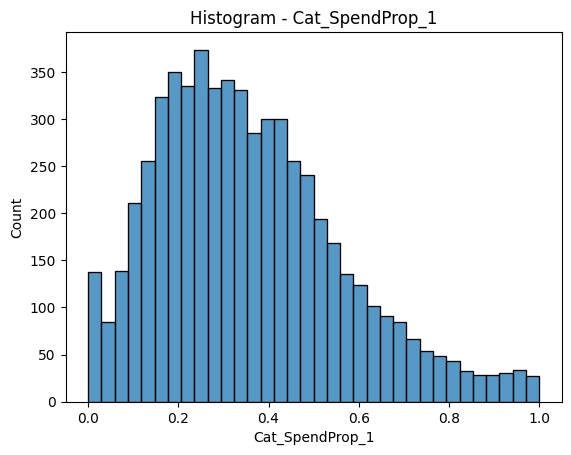

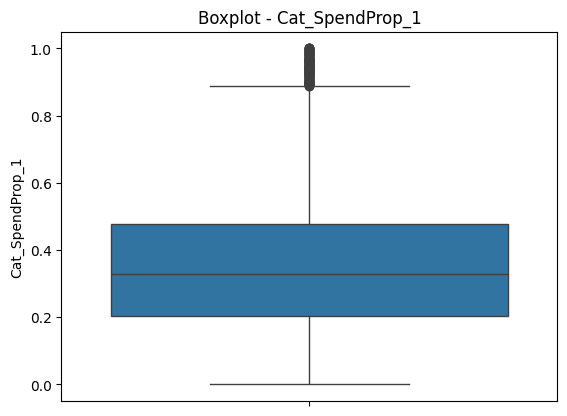


--------------------------------------------------------------------------------------------------------------------------------------------
Cat_SpendProp_5


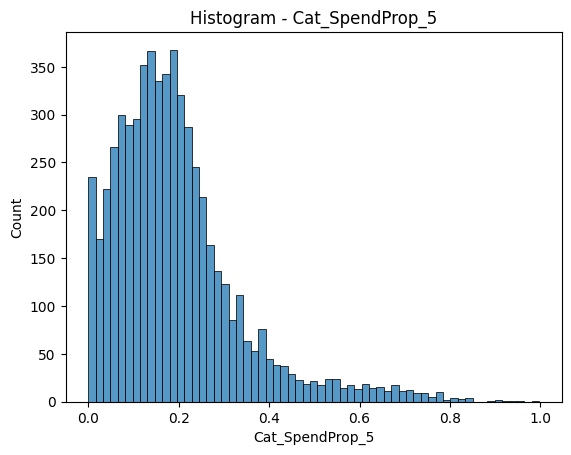

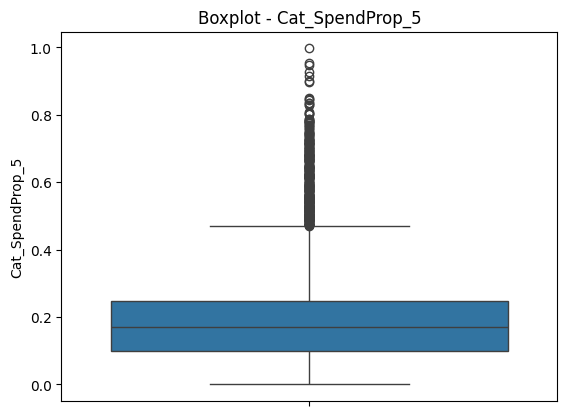


--------------------------------------------------------------------------------------------------------------------------------------------
Cat_SpendProp_8


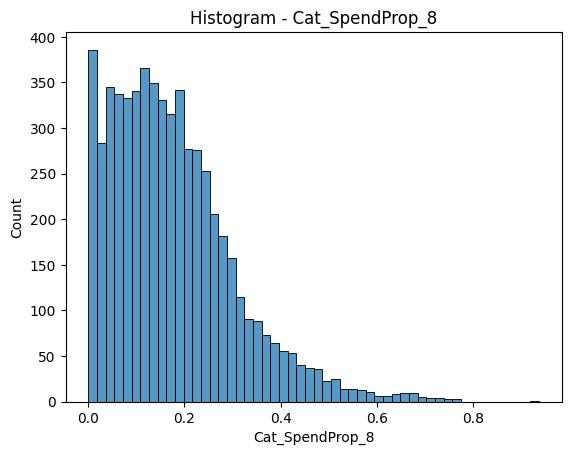

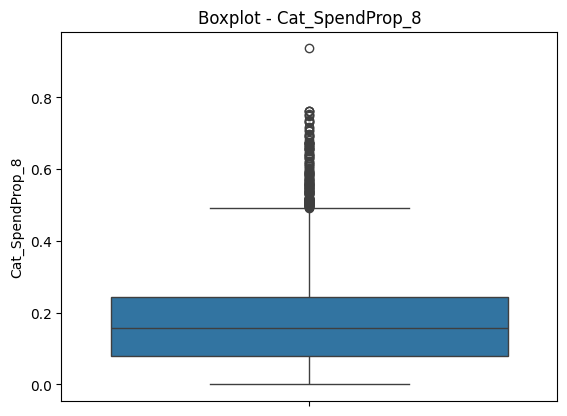


--------------------------------------------------------------------------------------------------------------------------------------------
Cat_SpendProp_11


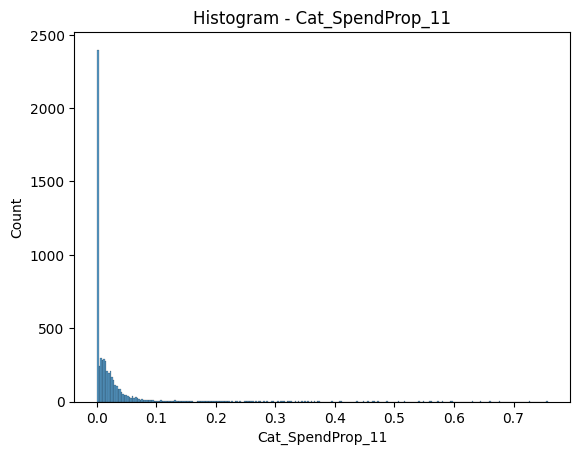

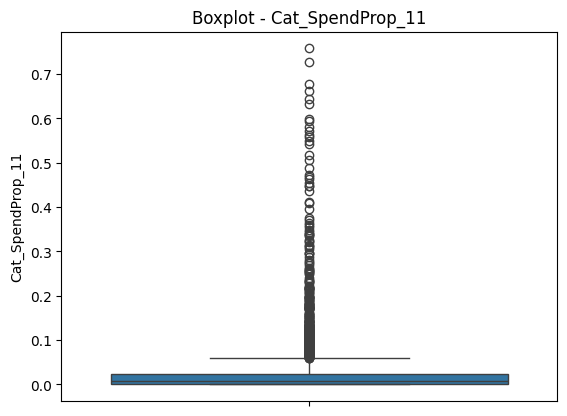


--------------------------------------------------------------------------------------------------------------------------------------------
Cat_SpendProp_Other


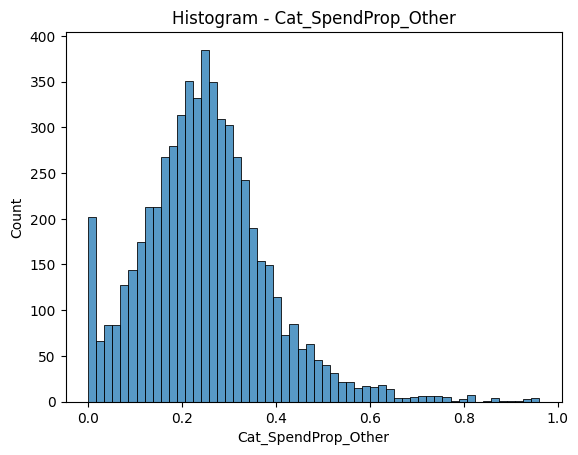

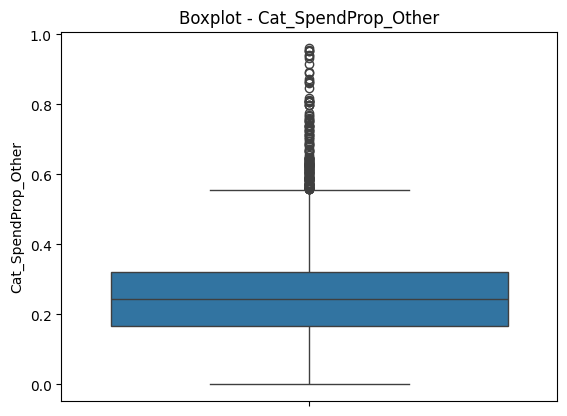

In [ ]:
for col in new_category_spent_vbls:
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
    print(col)
    fig_1 = sns.histplot(df[col])
    plt.title(f"Histogram - {col}")
    plt.show()
    fig_2 = sns.boxplot(df[col], orient='v')
    plt.title(f"Boxplot - {col}")
    plt.show()
    print()

In [ ]:
# Every distribution is highly right skewed
# Let's check for outliers before and after applying log transformation

In [ ]:
for col in new_category_spent_vbls:
    print(col)
    print(outlier_percentage(df[col]))
    print()
    print(f"{col} (log-transformed)")
    print(outlier_percentage(np.log1p(df[col])))
    print()

Cat_SpendProp_1
('Outlier Percentage : 1.97%', 'Outlier Count : 116')

Cat_SpendProp_1 (log-transformed)
('Outlier Percentage : 0.0%', 'Outlier Count : 0')

Cat_SpendProp_5
('Outlier Percentage : 5.19%', 'Outlier Count : 306')

Cat_SpendProp_5 (log-transformed)
('Outlier Percentage : 4.38%', 'Outlier Count : 258')

Cat_SpendProp_8
('Outlier Percentage : 2.58%', 'Outlier Count : 152')

Cat_SpendProp_8 (log-transformed)
('Outlier Percentage : 1.66%', 'Outlier Count : 98')

Cat_SpendProp_11
('Outlier Percentage : 7.62%', 'Outlier Count : 449')

Cat_SpendProp_11 (log-transformed)
('Outlier Percentage : 7.42%', 'Outlier Count : 437')

Cat_SpendProp_Other
('Outlier Percentage : 2.65%', 'Outlier Count : 156')

Cat_SpendProp_Other (log-transformed)
('Outlier Percentage : 1.88%', 'Outlier Count : 111')



In [ ]:
# Majority of the columns were right skewed
# Outlier percentage is very less for majority of the columns
# It is dropping to a even more lower level once we apply log transformation
# For some it is staying exactly the same
# But there is no error in our data and those rows might contain important information about customer behaviour
# Therefore, deciding not to drop those rows

In [ ]:
# Storing the log transformed versions of num_products, num_transactions, new category spent variables

In [ ]:
num_vbls_skewed = ['Num_Transactions',
                   'Cat_SpendProp_1',
                   'Cat_SpendProp_5',
                   'Cat_SpendProp_8',
                   'Cat_SpendProp_11',
                   'Cat_SpendProp_Other']

# Log-transform and create new columns
for col in num_vbls_skewed:
    df[col + '_log'] = np.log1p(df[col])

# Drop original columns
df = df.drop(columns=num_vbls_skewed)

# Rearranging the columns
df = df.reindex(columns = ['User_ID', 'Gender',
       'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Stay_In_Current_City_Years', 'ProductCategory_Diversity',
       'Most_Frequent_CategoryID', 'Avg_Purchase_Amount',
       'Num_Transactions_log', 'Cat_SpendProp_1_log', 'Cat_SpendProp_5_log',
       'Cat_SpendProp_8_log', 'Cat_SpendProp_11_log',
       'Cat_SpendProp_Other_log', 'CLV'])

df.head()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,ProductCategory_Diversity,Most_Frequent_CategoryID,Avg_Purchase_Amount,Num_Transactions_log,Cat_SpendProp_1_log,Cat_SpendProp_5_log,Cat_SpendProp_8_log,Cat_SpendProp_11_log,Cat_SpendProp_Other_log,CLV
0,1000001,F,0-17,10,A,0,2,11,Other,9545.514286,3.583519,0.169229,0.046062,0.189092,0.000000,0.444889,334093
1,1000002,M,55+,16,C,0,4+,6,1,10525.610390,4.356709,0.412378,0.094685,0.230726,0.000000,0.122897,810472
2,1000003,M,26-35,15,A,0,3,6,1,11780.517241,3.401197,0.512267,0.170295,0.016884,0.000000,0.120666,341635
3,1000004,M,46-50,7,B,1,2,2,1,14747.714286,2.708050,0.691982,0.000000,0.000000,0.000000,0.002327,206468
4,1000005,M,26-35,20,A,1,1,12,8,7745.292453,4.672829,0.212516,0.132612,0.275628,0.012766,0.255573,821001


#### 3.3 Correlation Matrix (For numerical variables)

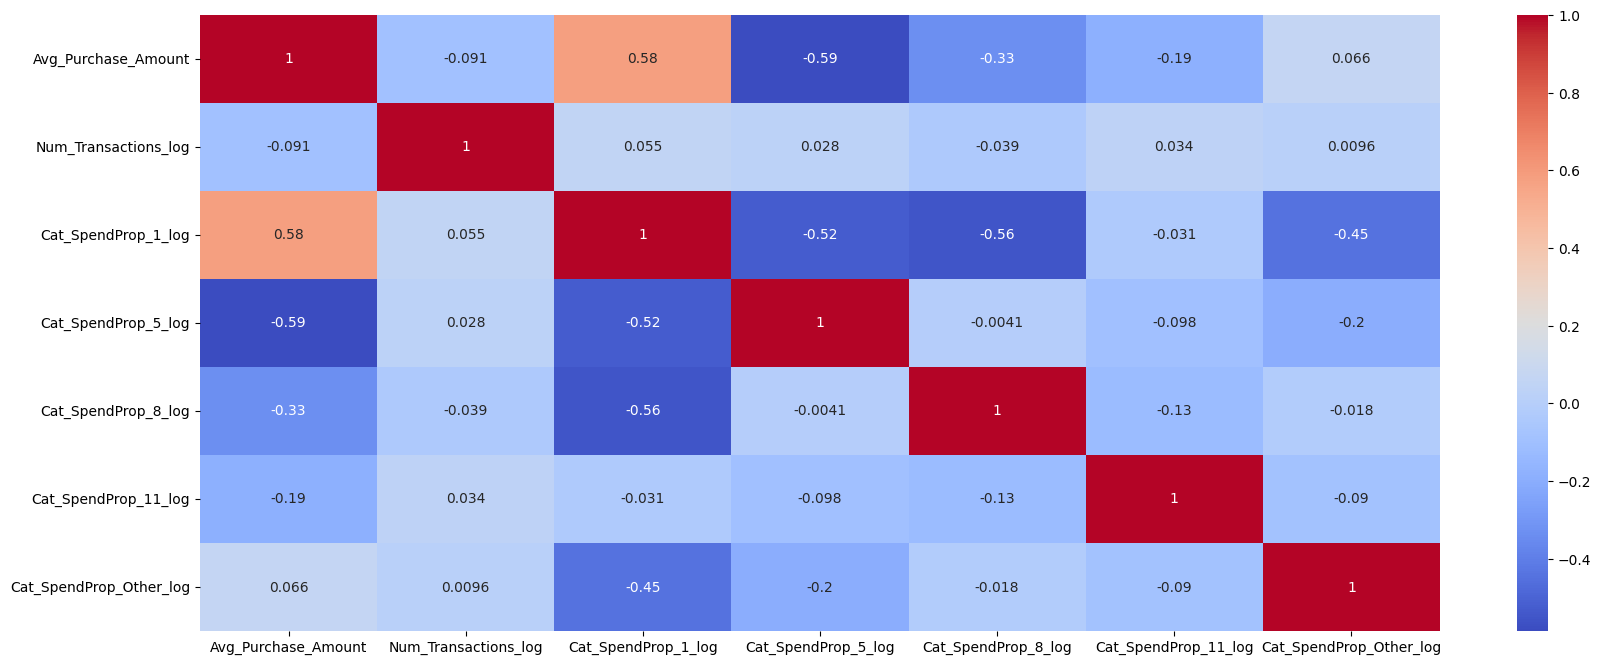

In [ ]:
corr_vbls = [
    'Avg_Purchase_Amount','Num_Transactions_log',
    'Cat_SpendProp_1_log', 'Cat_SpendProp_5_log','Cat_SpendProp_8_log', 'Cat_SpendProp_11_log','Cat_SpendProp_Other_log'
]
corr_matrix = df[corr_vbls].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# There is neglible correlation between the features except for 5 cases
# Cat_Spend_Prop_1 has a moderate positive correlation with Avg_Purchase_Amount (0.58)
# Cat_Spend_Prop_5 has a moderate negative correlation with Avg_Purchase_Amount (-0.59)
# Cat_Spend_Prop_1 has a moderate negative correlation with Cat_Spend_Prop_5 (-0.52)
# Cat_Spend_Prop_1 has a moderate negative correlation with Cat_Spend_Prop_8 (-0.56)
# Cat_Spend_Prop_1 has a moderate negative correlation with Cat_Spend_Prop_Other (-0.45)
# The reason we are getting information about these three categories might be due to the fact that these are the 3 most popular categories among the customers

#### 3.4 Inspecting target variable's skewness

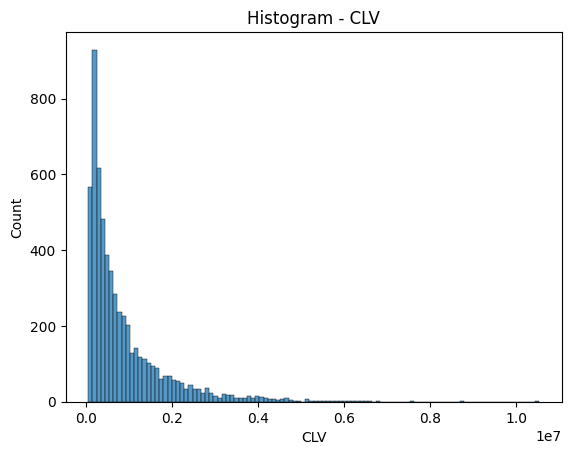

In [ ]:
# Histogram of CLV
sns.histplot(df['CLV'])
plt.title(f"Histogram - CLV")
plt.show()

In [ ]:
# Skewness of CLV
print("Skewness of CLV (target variable):", df['CLV'].skew())

Skewness of CLV (target variable): 2.427963672394112


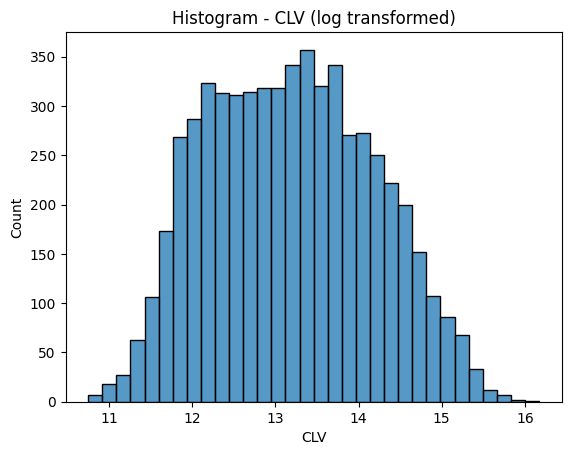

In [ ]:
sns.histplot(np.log1p(df['CLV']))
plt.title(f"Histogram - CLV (log transformed)")
plt.show()

In [ ]:
# Skewness of CLV (log-transformed)
print("Skewness of log-transformed CLV (target variable):", np.log1p(df['CLV']).skew())

Skewness of log-transformed CLV (target variable): 0.1365283556630348


In [ ]:
# We'll model this log transformed variable and to get the final predictions we'll use an inverse transformation

In [ ]:
# Adding it as a new column
df["CLV_log"] = np.log1p(df["CLV"])

#### 3.5 Relationship of features with target variable

In [ ]:
# Categorical variables

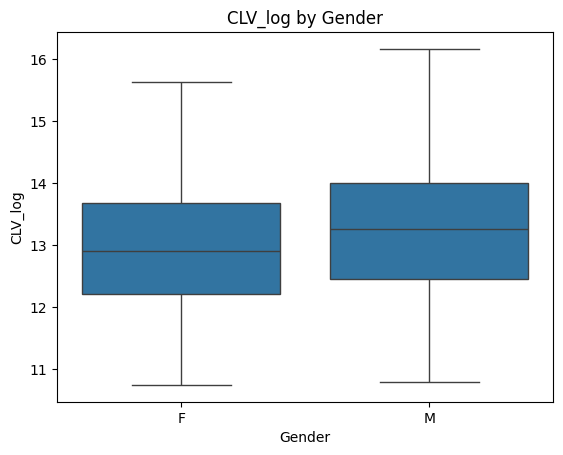

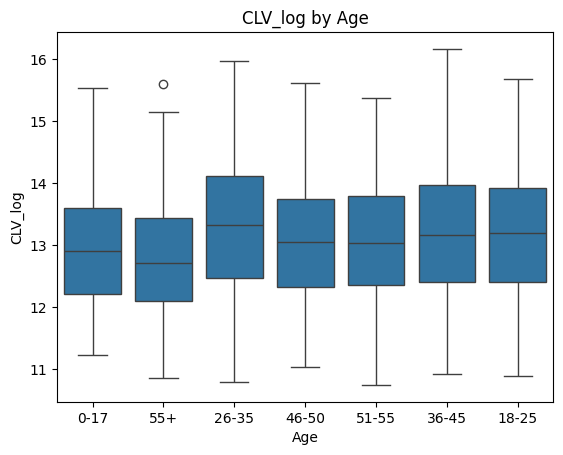

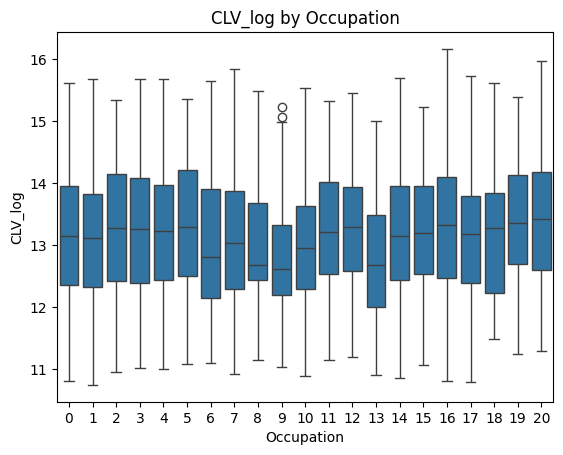

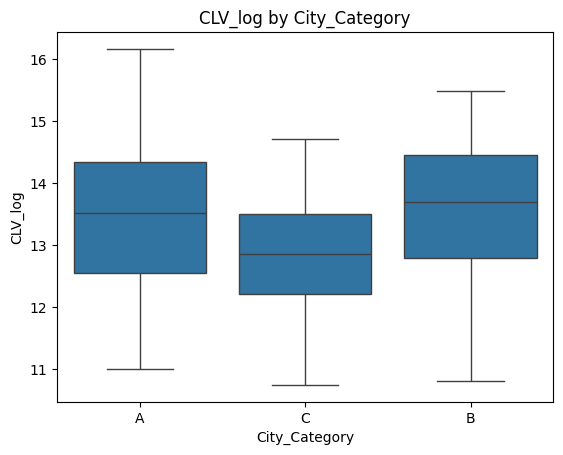

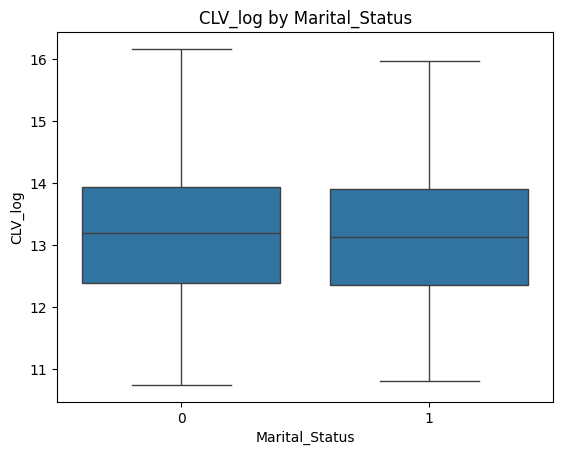

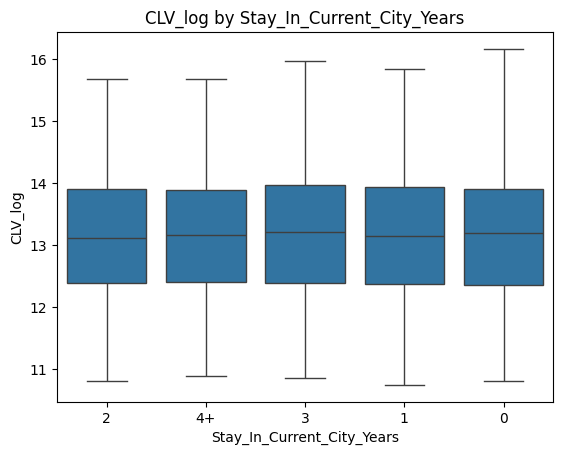

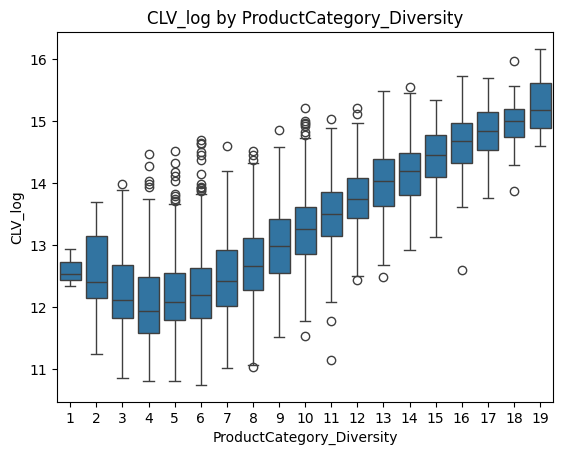

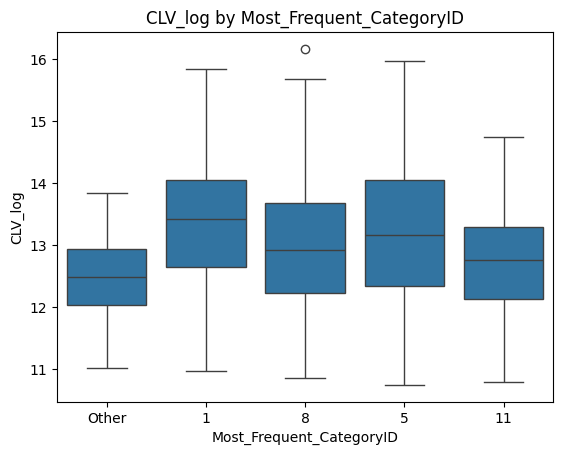

In [ ]:
for col in cat_vbls:
    sns.boxplot(data=df, x=col, y='CLV_log')
    plt.title(f'CLV_log by {col}')
    plt.xlabel(col)
    plt.ylabel('CLV_log')
    plt.show()

In [ ]:
# Gender: Males have a slightly higher CLV than females
# Age: 26-35 have the highest CLV by a small margin, Ages 18-55 provide slightly higher CLV than 0-17 and 55+
# Occupation: There is not much difference in CLV by occupation
# City_Category: A and B have higher CLV than C
# Marital_status: There is negligible difference in CLV by marital_status
# Stay_In_Current_City_Years: There is not much difference in CLV by Stay_In_Current_City_Years
# ProductCategoryDiversity: Higher the feature, higher the CLV
# Most_Frequent_CategoryID: Categories 1,5,8 offer a higher CLV than category 11 and other categories

In [ ]:
# Numerical variables

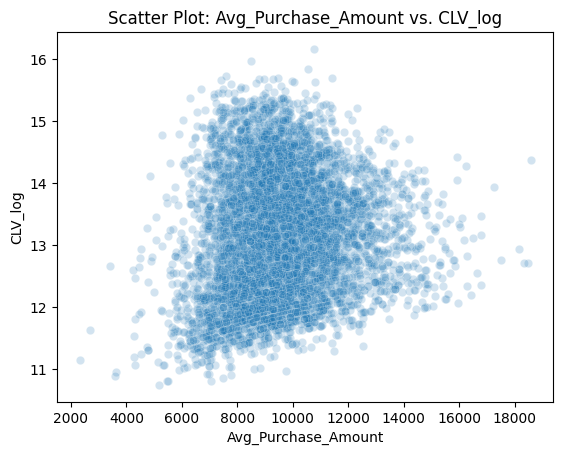

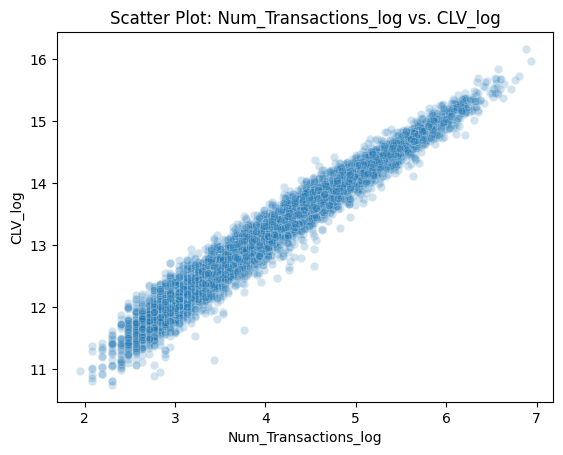

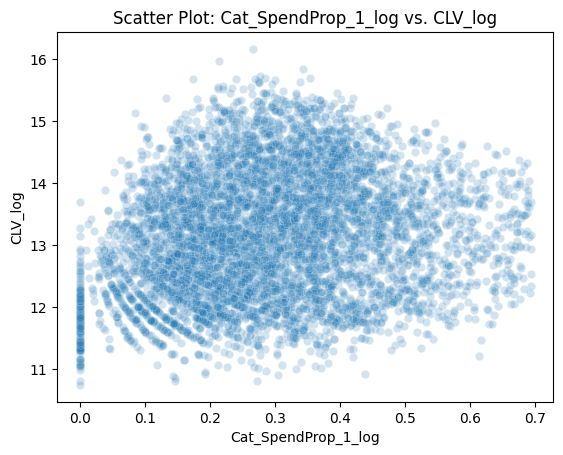

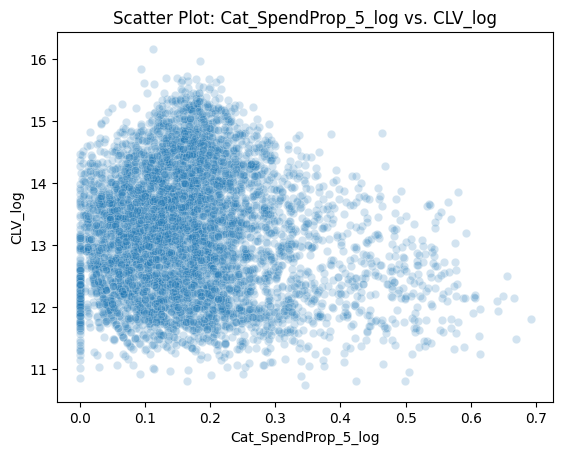

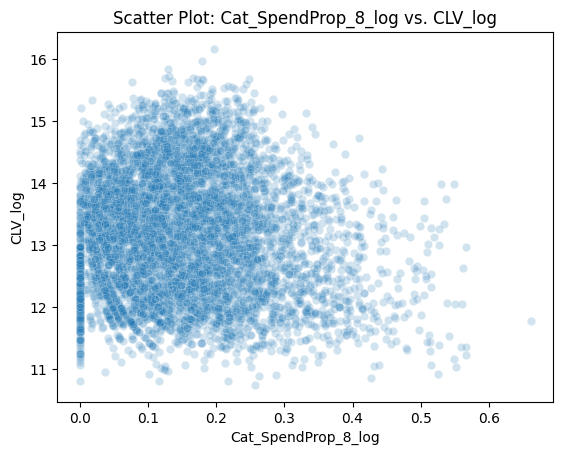

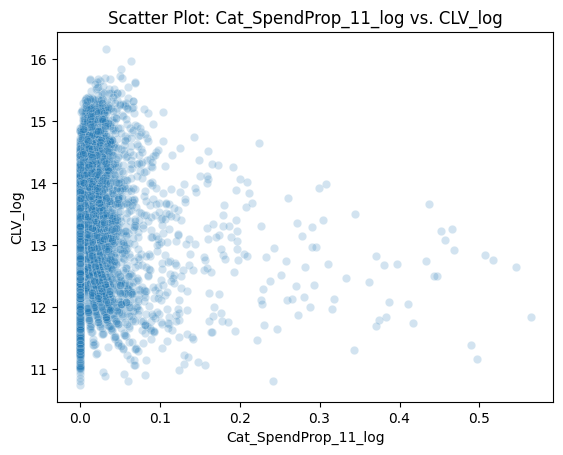

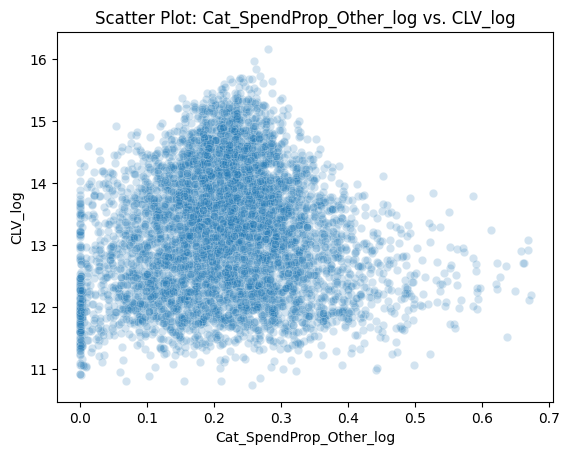

In [ ]:
for col in corr_vbls:
    sns.scatterplot(data=df, x=col, y='CLV_log', alpha=0.2)
    plt.title(f'Scatter Plot: {col} vs. CLV_log')
    plt.xlabel(col)
    plt.ylabel('CLV_log')
    plt.show()

In [ ]:
# Avg_Purchase_Amount: Higher Spenders Higher CLV
# Num_Transactions: More transactions higher CLV
# Cat_SpendProp_1: No clear direct relationship
# Cat_SpendProp_5: No clear direct relationship
# Cat_SpendProp_8: No clear direct relationship
# Cat_SpendProp_11: No clear direct relationship
# Cat_Spend_Prop_Other: No clear direct relationship

## 4. Modelling

#### 4.1 Preparing data for modelling

In [ ]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,ProductCategory_Diversity,Most_Frequent_CategoryID,Avg_Purchase_Amount,Num_Transactions_log,Cat_SpendProp_1_log,Cat_SpendProp_5_log,Cat_SpendProp_8_log,Cat_SpendProp_11_log,Cat_SpendProp_Other_log,CLV,CLV_log
0,1000001,F,0-17,10,A,0,2,11,Other,9545.514286,3.583519,0.169229,0.046062,0.189092,0.000000,0.444889,334093,12.719178
1,1000002,M,55+,16,C,0,4+,6,1,10525.610390,4.356709,0.412378,0.094685,0.230726,0.000000,0.122897,810472,13.605373
2,1000003,M,26-35,15,A,0,3,6,1,11780.517241,3.401197,0.512267,0.170295,0.016884,0.000000,0.120666,341635,12.741501
3,1000004,M,46-50,7,B,1,2,2,1,14747.714286,2.708050,0.691982,0.000000,0.000000,0.000000,0.002327,206468,12.237906
4,1000005,M,26-35,20,A,1,1,12,8,7745.292453,4.672829,0.212516,0.132612,0.275628,0.012766,0.255573,821001,13.618281


In [ ]:
# The final dataset for modelling
# Dropping User_ID as it is a primary key
# Dropping CLV as we will model CLV_log and then use inverse transformation to get final prediction
df_model = df.drop(['User_ID', 'CLV'], axis=1)

In [ ]:
df_model.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,ProductCategory_Diversity,Most_Frequent_CategoryID,Avg_Purchase_Amount,Num_Transactions_log,Cat_SpendProp_1_log,Cat_SpendProp_5_log,Cat_SpendProp_8_log,Cat_SpendProp_11_log,Cat_SpendProp_Other_log,CLV_log
0,F,0-17,10,A,0,2,11,Other,9545.514286,3.583519,0.169229,0.046062,0.189092,0.000000,0.444889,12.719178
1,M,55+,16,C,0,4+,6,1,10525.610390,4.356709,0.412378,0.094685,0.230726,0.000000,0.122897,13.605373
2,M,26-35,15,A,0,3,6,1,11780.517241,3.401197,0.512267,0.170295,0.016884,0.000000,0.120666,12.741501
3,M,46-50,7,B,1,2,2,1,14747.714286,2.708050,0.691982,0.000000,0.000000,0.000000,0.002327,12.237906
4,M,26-35,20,A,1,1,12,8,7745.292453,4.672829,0.212516,0.132612,0.275628,0.012766,0.255573,13.618281


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5891 non-null   object 
 1   Age                         5891 non-null   object 
 2   Occupation                  5891 non-null   int64  
 3   City_Category               5891 non-null   object 
 4   Marital_Status              5891 non-null   int64  
 5   Stay_In_Current_City_Years  5891 non-null   object 
 6   ProductCategory_Diversity   5891 non-null   int64  
 7   Most_Frequent_CategoryID    5891 non-null   object 
 8   Avg_Purchase_Amount         5891 non-null   float64
 9   Num_Transactions_log        5891 non-null   float64
 10  Cat_SpendProp_1_log         5891 non-null   float64
 11  Cat_SpendProp_5_log         5891 non-null   float64
 12  Cat_SpendProp_8_log         5891 non-null   float64
 13  Cat_SpendProp_11_log        5891 

In [ ]:
# Categorical variables
# Gender, Age, Occupation, City_Category, Marital_Status, Stay_In_Current_City_Years, Most_Frequent_CategoryID

# Numerical variables
# ProductCategory_Diversity, Avg_Purchase_Amount, Num_Transactions_log
# Cat_SpendProp_1_log, Cat_SpendProp_5_log, Cat_SpendProp_8_log, Cat_SpendProp_11_log, Cat_SpendProp_Other_log

# Target variable
# CLV_log

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# Setting Most_Frequent_CategoryID to a uniform datatype
df_model['Most_Frequent_CategoryID'] = df_model['Most_Frequent_CategoryID'].astype(str)

In [ ]:
# Encoding categorical features
cat_features = [
    'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
    'Stay_In_Current_City_Years', 'Most_Frequent_CategoryID'
]

label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X = df_model.drop('CLV_log', axis=1)
y = df_model['CLV_log']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [ ]:
# Scaling numerical features
num_features = [
    'ProductCategory_Diversity', 'Avg_Purchase_Amount', 'Num_Transactions_log',
    'Cat_SpendProp_1_log', 'Cat_SpendProp_5_log', 'Cat_SpendProp_8_log',
    'Cat_SpendProp_11_log', 'Cat_SpendProp_Other_log'
]

scaler = MinMaxScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])

X_val[num_features] = scaler.transform(X_val[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#### 4.2 Tabular Neural Network with Embeddings

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random
import tensorflow as tf
import keras
from tensorflow.keras import layers
import keras_tuner as kt

In [ ]:
# Setting seed
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# Cardinality of each categorical feature
cat_cardinalities = {col: int(df_model[col].nunique()) for col in cat_features}
cat_cardinalities

{'Gender': 2,
 'Age': 7,
 'Occupation': 21,
 'City_Category': 3,
 'Marital_Status': 2,
 'Stay_In_Current_City_Years': 5,
 'Most_Frequent_CategoryID': 5}

In [ ]:
# Function to build a Tabular Neural Network
def build_tabular_model(hp):

    # Inputs
    inputs = []
    encoded_features = []

    # Embeddings for categorical features
    for col in cat_features:
        input_cat = keras.Input(shape=(1,), name=col)
        emb_dim = hp.Int(f"{col}_emb_dim", min_value=2, max_value=min(21, cat_cardinalities[col]), step=1)
        emb = layers.Embedding(input_dim=cat_cardinalities[col], output_dim=emb_dim, name=f"{col}_emb")(input_cat)
        emb = layers.Reshape((emb_dim,))(emb)
        inputs.append(input_cat)
        encoded_features.append(emb)

    # Numerical features
    input_num = keras.Input(shape=(len(num_features),), name="numerical")
    inputs.append(input_num)
    encoded_features.append(input_num)

    # Concatenate all features
    x = layers.Concatenate()(encoded_features)

    # Hidden layers
    for i in range(hp.Int("num_layers", 1, 3)):
        x = layers.Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
            activation=hp.Choice("activation", ["relu", "elu"]))(x)
        x = layers.Dropout(hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1))(x)

    # Output layer
    output = layers.Dense(1, activation="linear")(x)

    model = keras.Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float("lr", 1e-4, 1e-2, sampling="log")),
        loss="mse",
        metrics=["mae"]
    )
    return model

In [ ]:
# Prepare data for model inputs
def prepare_inputs(X):
    # Returns a dict: {feature_name: values}
    inputs = {col: X[col].values for col in cat_features}
    inputs["numerical"] = X[num_features].values
    return inputs

train_inputs = prepare_inputs(X_train)
val_inputs = prepare_inputs(X_val)
test_inputs = prepare_inputs(X_test)

In [ ]:
# Finding the best model using hyperparameter tuning (Bayesian Optimization)
tuner_dir = './untitled_project/'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

tuner = kt.BayesianOptimization(
    build_tabular_model,
    objective="val_mae",
    max_trials=20
)

tuner.search(
    train_inputs, y_train,
    validation_data=(val_inputs, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Trial 20 Complete [00h 00m 32s]
val_mae: 0.13883434236049652

Best val_mae So Far: 0.07287323474884033
Total elapsed time: 00h 08m 18s


In [ ]:
# Fitting the best model
best_model = tuner.get_best_models(1)[0]
history = best_model.fit(
    train_inputs, y_train,
    validation_data=(val_inputs, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6256 - mae: 0.6365 - val_loss: 0.0280 - val_mae: 0.1414
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5080 - mae: 0.5709 - val_loss: 0.0219 - val_mae: 0.1220
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4515 - mae: 0.5391 - val_loss: 0.0147 - val_mae: 0.0996
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4572 - mae: 0.5415 - val_loss: 0.0369 - val_mae: 0.1627
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4491 - mae: 0.5330 - val_loss: 0.0105 - val_mae: 0.0823
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4271 - mae: 0.5188 - val_loss: 0.0697 - val_mae: 0.2466
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4428 - mae: 0.5268 - val_loss: 0.0095 - val_mae: 0.0794
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4457 - mae: 0.5298 - val_loss: 0.0459 - val_mae: 0.1958
Epoch 9/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

In [ ]:
# Best model hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print(best_hps.values)

{'Gender_emb_dim': 2, 'Age_emb_dim': 7, 'Occupation_emb_dim': 5, 'City_Category_emb_dim': 2, 'Marital_Status_emb_dim': 2, 'Stay_In_Current_City_Years_emb_dim': 2, 'Most_Frequent_CategoryID_emb_dim': 5, 'num_layers': 1, 'units_0': 256, 'activation': 'elu', 'dropout_0': 0.4, 'lr': 0.005365791342315633, 'units_1': 192, 'dropout_1': 0.4, 'units_2': 32, 'dropout_2': 0.4}


In [ ]:
# Save the best model
save_path = "/content/drive/MyDrive/Colab Notebooks/NNDL Project/tabular_best_model.keras"
best_model.save(save_path)

In [ ]:
# Load the best model
best_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NNDL Project/tabular_best_model.keras")

In [ ]:
# Getting the original y_test values
y_test_orig = np.expm1(y_test)

# Predicting y_test
y_pred = best_model.predict(test_inputs).flatten()

# Converting y_pred
y_pred_orig = np.expm1(y_pred)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Actual MAPE
actual_mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig)*100
print(f"Actual MAPE (original scale): {actual_mape:.4f}")

Actual MAPE (original scale): 8.3753


#### 4.3 FTTransformer

In [ ]:
!pip install pytorch-tabular optuna

In [ ]:
import optuna
import torch
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer.config import FTTransformerConfig

In [ ]:
from torch.serialization import add_safe_globals
from omegaconf import DictConfig, ListConfig
from omegaconf.base import ContainerMetadata, Metadata
from omegaconf.nodes import AnyNode
from typing import Any
import collections

# Add required safe globals
add_safe_globals([
    DictConfig,
    ListConfig,
    ContainerMetadata,
    Metadata,
    AnyNode,
    Any,
    dict,
    list,
    int,
    collections.defaultdict
])

In [ ]:
# Prepare data for model inputs
train_df = X_train.copy()
train_df["CLV_log"] = y_train

val_df = X_val.copy()
val_df["CLV_log"] = y_val

test_df = X_test.copy()
test_df["CLV_log"] = y_test

categorical_cols = cat_features
continuous_cols = num_features
target_col = ["CLV_log"]

In [ ]:
# Function to build a FTTransformer
def objective(trial):

    # Hyperparameter search space
    params = {
        "learning_rate": trial.suggest_float("lr", 1e-4, 1e-2, log=True),
        "ff_dropout": trial.suggest_float("dropout", 0.1, 0.5),
        "attn_dropout": trial.suggest_float("attention_dropout", 0.1, 0.5),
        "input_embed_dim": trial.suggest_categorical("input_embed_dim", [32, 64, 128]),
        "num_heads": trial.suggest_categorical("n_heads", [2, 4, 8]),
        "num_attn_blocks": trial.suggest_int("num_blocks", 2, 4),
    }

    # FTTransformer model config with MAE as primary metric
    model_config = FTTransformerConfig(
        task="regression",
        metrics=["mean_absolute_error"],  # using MAE
        **params
    )

    # Specify target, continuous, categorical columns
    data_config = DataConfig(
        target=target_col,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
    )

    # Trainer config — 20 epochs, batch_size=128
    trainer_config = TrainerConfig(
        max_epochs=21,
        batch_size=128,
        early_stopping="valid_mean_absolute_error",
        early_stopping_patience=5,
        checkpoints="valid_mean_absolute_error",
    )

    optimizer_config = OptimizerConfig(
        optimizer="Adam"
    )

    # Build & train model
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config
    )

    model.fit(train=train_df, validation=val_df)
    result = model.evaluate(val_df)

    # Use MAE as objective to minimize
    return result[0]["test_mean_absolute_error"]

In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
!pip install aiohttp --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.12.14
    Uninstalling aiohttp-3.12.14:
      Successfully uninstalled aiohttp-3.12.14


In [ ]:
# Finding the best model using hyperparameter tuning (Bayesian Optimization)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

[I 2025-08-04 14:05:44,862] A new study created in memory with name: no-name-d8018114-98d6-4f84-8488-d1c787ed1354
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  1.8 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  9.8 K │ train │
│ 2 │ _head            │ LinearHead            │    129 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 1.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.8 M                                                                                                
Total estimated model params size (MB): 7                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.051519427448511124    │
│ test_mean_absolute_error  │    0.19196610152721405    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:09:18,208] Trial 0 finished with value: 0.19196610152721405 and parameters: {'lr': 0.001316100784101777, 'dropout': 0.3126141263168156, 'attention_dropout': 0.46507523365291104, 'input_embed_dim': 128, 'n_heads': 4, 'num_blocks': 4}. Best is trial 0 with value: 0.19196610152721405.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  230 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 235 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 235 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 64                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.040019068866968155    │
│ test_mean_absolute_error  │    0.14793036878108978    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:10:35,626] Trial 1 finished with value: 0.14793036878108978 and parameters: {'lr': 0.0006527040232248538, 'dropout': 0.22300154572732228, 'attention_dropout': 0.3487193382926611, 'input_embed_dim': 64, 'n_heads': 4, 'num_blocks': 2}. Best is trial 1 with value: 0.14793036878108978.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  329 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 334 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 334 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.044541530311107635    │
│ test_mean_absolute_error  │    0.14624343812465668    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:13:05,175] Trial 2 finished with value: 0.14624343812465668 and parameters: {'lr': 0.0004497300050392148, 'dropout': 0.23953291195551835, 'attention_dropout': 0.2644640518710578, 'input_embed_dim': 64, 'n_heads': 2, 'num_blocks': 4}. Best is trial 2 with value: 0.14624343812465668.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  460 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 465 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 465 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.012955136597156525    │
│ test_mean_absolute_error  │    0.07820215821266174    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:16:10,751] Trial 3 finished with value: 0.07820215821266174 and parameters: {'lr': 0.0009011681980367611, 'dropout': 0.16101452102853242, 'attention_dropout': 0.12297610013982352, 'input_embed_dim': 64, 'n_heads': 4, 'num_blocks': 4}. Best is trial 3 with value: 0.07820215821266174.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  135 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.5 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 138 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 138 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.019094504415988922    │
│ test_mean_absolute_error  │    0.08870840072631836    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:17:28,545] Trial 4 finished with value: 0.08870840072631836 and parameters: {'lr': 0.005844747232427547, 'dropout': 0.3805613725302385, 'attention_dropout': 0.14402039540275213, 'input_embed_dim': 32, 'n_heads': 8, 'num_blocks': 3}. Best is trial 3 with value: 0.07820215821266174.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  361 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 366 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 366 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 64                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.0482795350253582     │
│ test_mean_absolute_error  │    0.15156926214694977    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:19:11,229] Trial 5 finished with value: 0.15156926214694977 and parameters: {'lr': 0.002915252041938648, 'dropout': 0.46956863446950925, 'attention_dropout': 0.20192095266754762, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 2}. Best is trial 3 with value: 0.07820215821266174.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  541 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 546 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 546 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.01333817932754755    │
│ test_mean_absolute_error  │    0.07761039584875107    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:22:14,483] Trial 6 finished with value: 0.07761039584875107 and parameters: {'lr': 0.0010881024399033857, 'dropout': 0.11986889798556694, 'attention_dropout': 0.24065389287135802, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  230 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 235 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 235 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 64                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.03454621508717537    │
│ test_mean_absolute_error  │    0.13457073271274567    │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:23:30,901] Trial 7 finished with value: 0.13457073271274567 and parameters: {'lr': 0.0006625200332354621, 'dropout': 0.16176164369458448, 'attention_dropout': 0.13499491342506525, 'input_embed_dim': 64, 'n_heads': 4, 'num_blocks': 2}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  722 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 727 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 727 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0352672338485718     │
│ test_mean_absolute_error  │    0.8448945879936218     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:25:02,028] Trial 8 finished with value: 0.8448945879936218 and parameters: {'lr': 0.001469710130029185, 'dropout': 0.4893542159145583, 'attention_dropout': 0.334523435632657, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 4}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  722 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 727 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 727 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.1954813450574875     │
│ test_mean_absolute_error  │    0.2846900522708893     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:29:35,743] Trial 9 finished with value: 0.2846900522708893 and parameters: {'lr': 0.00024028361097832494, 'dropout': 0.17130450649251394, 'attention_dropout': 0.2407690424595196, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 4}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │ 62.0 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.5 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 64.5 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 64.5 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     4.994258880615234     │
│ test_mean_absolute_error  │    1.9999905824661255     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:30:44,119] Trial 10 finished with value: 1.9999905824661255 and parameters: {'lr': 0.00010857245302154672, 'dropout': 0.10620317637651103, 'attention_dropout': 0.4108244957930499, 'input_embed_dim': 32, 'n_heads': 2, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  1.4 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  9.8 K │ train │
│ 2 │ _head            │ LinearHead            │    129 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 1.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 M                                                                                                
Total estimated model params size (MB): 5                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4580129384994507     │
│ test_mean_absolute_error  │    0.9978973269462585     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:33:02,543] Trial 11 finished with value: 0.9978973269462585 and parameters: {'lr': 0.0022858421488512826, 'dropout': 0.1296573681044998, 'attention_dropout': 0.1009548115992512, 'input_embed_dim': 128, 'n_heads': 4, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  541 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 546 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 546 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.165541410446167     │
│ test_mean_absolute_error  │    0.8921616077423096     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:34:14,370] Trial 12 finished with value: 0.8921616077423096 and parameters: {'lr': 0.009836766022780935, 'dropout': 0.24709156298089102, 'attention_dropout': 0.1895011172458364, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  345 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 350 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 350 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.206417977809906     │
│ test_mean_absolute_error  │    0.3545055687427521     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:36:38,339] Trial 13 finished with value: 0.3545055687427521 and parameters: {'lr': 0.00030128279059583407, 'dropout': 0.18424758669534047, 'attention_dropout': 0.28676186230493095, 'input_embed_dim': 64, 'n_heads': 4, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  1.3 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  9.8 K │ train │
│ 2 │ _head            │ LinearHead            │    129 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 1.3 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.3 M                                                                                                
Total estimated model params size (MB): 5                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.2099627256393433     │
│ test_mean_absolute_error  │    0.9078164100646973     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:39:41,535] Trial 14 finished with value: 0.9078164100646973 and parameters: {'lr': 0.0029001353840625026, 'dropout': 0.3224289442363353, 'attention_dropout': 0.20342145592394523, 'input_embed_dim': 128, 'n_heads': 2, 'num_blocks': 4}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  135 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.5 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 138 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 138 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.04460921138525009    │
│ test_mean_absolute_error  │    0.1460646390914917     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:41:26,499] Trial 15 finished with value: 0.1460646390914917 and parameters: {'lr': 0.0008650103264825803, 'dropout': 0.10238261319074915, 'attention_dropout': 0.1601037554936817, 'input_embed_dim': 32, 'n_heads': 8, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  460 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 465 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 465 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 100                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.012392902746796608    │
│ test_mean_absolute_error  │    0.0796266719698906     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:43:55,097] Trial 16 finished with value: 0.0796266719698906 and parameters: {'lr': 0.0015391112986021813, 'dropout': 0.21173460907166605, 'attention_dropout': 0.1050425824108416, 'input_embed_dim': 64, 'n_heads': 4, 'num_blocks': 4}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  361 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 366 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 366 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 64                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9082362055778503     │
│ test_mean_absolute_error  │    0.7925010323524475     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:46:25,397] Trial 17 finished with value: 0.7925010323524475 and parameters: {'lr': 0.00016209169231245005, 'dropout': 0.27286972275188637, 'attention_dropout': 0.2366326758600798, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 2}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │ 86.5 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.5 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 89.0 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 89.0 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8964086174964905     │
│ test_mean_absolute_error  │    0.7862823009490967     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:47:44,342] Trial 18 finished with value: 0.7862823009490967 and parameters: {'lr': 0.0004516019702205908, 'dropout': 0.13927414650343078, 'attention_dropout': 0.3311366453569694, 'input_embed_dim': 32, 'n_heads': 4, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  985 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  9.8 K │ train │
│ 2 │ _head            │ LinearHead            │    129 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 995 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 995 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.1664226055145264     │
│ test_mean_absolute_error  │    0.8924705386161804     │
└───────────────────────────┴───────────────────────────┘

[I 2025-08-04 14:49:40,564] Trial 19 finished with value: 0.8924705386161804 and parameters: {'lr': 0.004830896316216722, 'dropout': 0.3783590257720418, 'attention_dropout': 0.4083730712334308, 'input_embed_dim': 128, 'n_heads': 2, 'num_blocks': 3}. Best is trial 6 with value: 0.07761039584875107.


In [ ]:
# Best model hyperparameters
best_params = study.best_params
print("Best hyperparameters found:")
print(best_params)

Best hyperparameters found:
{'lr': 0.0010881024399033857, 'dropout': 0.11986889798556694, 'attention_dropout': 0.24065389287135802, 'input_embed_dim': 64, 'n_heads': 8, 'num_blocks': 3}


In [ ]:
# Fitting the best model

model_config = FTTransformerConfig(
    task="regression",
    metrics=["mean_absolute_error"],
    learning_rate=best_params["lr"],
    ff_dropout=best_params["dropout"],
    attn_dropout=best_params["attention_dropout"],
    input_embed_dim=best_params["input_embed_dim"],
    num_heads=best_params["n_heads"],
    num_attn_blocks=best_params["num_blocks"],
)

data_config = DataConfig(
        target=target_col,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
)

trainer_config = TrainerConfig(
    max_epochs=21,
    batch_size=128,
    early_stopping="valid_mean_absolute_error",
    early_stopping_patience=5,
    checkpoints="valid_mean_absolute_error"
)

optimizer_config = OptimizerConfig()

# Build and train final model
best_model = TabularModel(
    data_config=data_config,
    model_config=model_config ,
    trainer_config=trainer_config,
    optimizer_config=optimizer_config,
)

best_model.fit(train=train_df, validation=val_df)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  541 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  4.9 K │ train │
│ 2 │ _head            │ LinearHead            │     65 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 546 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 546 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 82                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


In [ ]:
# Save the best model
save_path = "/content/drive/MyDrive/Colab Notebooks/NNDL Project/ftt_best_model"
best_model.save_model(save_path)

In [ ]:
# Load the best model
best_model = TabularModel.load_model(save_path)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# predicted CLV_log on test set
pred_df = best_model.predict(test_df)

# true values (CLV_log)
true_clv_log = test_df["CLV_log"].values

y_true = np.expm1(true_clv_log)
y_pred = np.expm1(pred_df["CLV_log_prediction"].values)

In [ ]:
# Actual MAPE
actual_mape = mean_absolute_percentage_error(y_true, y_pred)*100
print(f"Actual MAPE (original scale): {actual_mape:.4f}")

Actual MAPE (original scale): 7.3330
